In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\pourt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Statistiques descriptives

En première analyse et afin de se familiariser avec les données obtenues avec le datascraping, nous allons faire quelques statistiques descriptives sur notre base de données

In [5]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df_questions = pd.read_csv('/Users/iokanaanbelfis-simon/PythonPourLaDataScience/Datascrapping/data.csv', encoding='latin-1', sep='|')

# Afficher les premières lignes du DataFrame
print(df_questions.head())

print(df_questions.columns)

   id                                             groupe  \
0  21                                        Renaissance   
1  22                                        Renaissance   
2   1  LibertÃ©s, IndÃ©pendants, Outre-mer et Territo...   
3   2                                  Les RÃ©publicains   
4   3                DÃ©mocrate (MoDem et IndÃ©pendants)   

                      nom                              ministÃ¨re_interrogÃ©  \
0  Mme Danielle Brulebois                              SantÃ© et prÃ©vention   
1       Mme Olga Givernet  Ãconomie, finances, souverainetÃ© industriell...   
2  M. Christophe Naegelen           Agriculture et souverainetÃ© alimentaire   
3       M. Pierre Cordier  Transition Ã©cologique et cohÃ©sion des territ...   
4     M. FrÃ©dÃ©ric Petit                                            ArmÃ©es   

                     rubrique  \
0       professions de santÃ©   
1  retraites : gÃ©nÃ©ralitÃ©s   
2                     animaux   
3            chasse et pÃª

In [9]:
def compte_occurrences_par_valeur(data_frame, nom_colonne, valeurs_possibles):
    """
    Renvoie une liste avec le nombre d'occurrences de chaque valeur dans une colonne du DataFrame.

    Args:
    - data_frame (pd.DataFrame): Le DataFrame pandas.
    - nom_colonne (str): Le nom de la colonne pour laquelle compter les occurrences.
    - valeurs_possibles (list): Liste des valeurs possibles.

    Returns:
    - list: Liste du nombre d'occurrences pour chaque valeur.
    """
    if nom_colonne in data_frame.columns:
        occurrences = [data_frame[data_frame[nom_colonne] == valeur].shape[0] for valeur in valeurs_possibles]
        return occurrences
    else:
        raise ValueError(f"La colonne {nom_colonne} n'existe pas dans le DataFrame.")

# Répartition des questions par groupe politique

Pour débuter, nous allons nous interesser à la proportion de questions aux gouvernements écrites en fonction de l'appartenance à un groupe politique




['Libertés, Indépendants, Outre-mer et Territoires', 'Les Républicains', 'Démocrate (MoDem et Indépendants)', 'Renaissance', 'Gauche démocrate et républicaine - NUPES', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Rassemblement National', 'Horizons et apparentés', 'Écologiste - NUPES', 'Socialistes et apparentés', nan, 'Non inscrit']
<class 'list'>


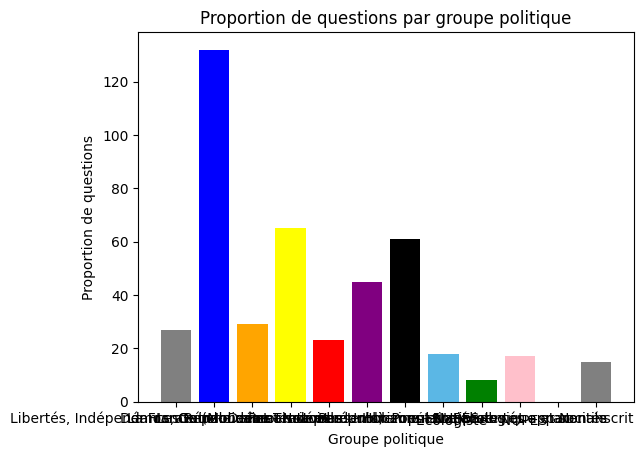

In [59]:
groupes_politiques = df_questions['groupe'].unique().tolist()
# liste qui comprend le nom de chaque groupe politique

nb_questions_gp_politique = compte_occurrences_par_valeur(df_questions, 'groupe', groupes_politiques)
# liste qui contient, pour chaque groupe politique, le nombre de questions posées présentes dans le dataframe)

print(groupes_politiques)
print(type(nb_questions_gp_politique))

import matplotlib.pyplot as plt

groupes_politiques = [str(element) for element in groupes_politiques]

#On définit une couleur bleu clair pour le groupe horizon

import colorsys

def obtenir_bleu_clair():
    """
    Retourne une couleur bleu clair au format hexadécimal.

    Returns:
    - str: Couleur bleu clair au format hexadécimal.
    """
    # Définir la teinte (H), la saturation (S), et la valeur (V)
    teinte_bleu_clair = 200  # Teinte bleu
    saturation = 0.6
    luminosite = 0.9

    # Convertir de HSV à RGB
    rgb_bleu_clair = colorsys.hsv_to_rgb(teinte_bleu_clair/360, saturation, luminosite)

    # Convertir de RGB à hexadécimal
    couleur_hex_bleu_clair = "#{:02X}{:02X}{:02X}".format(
        int(rgb_bleu_clair[0] * 255),
        int(rgb_bleu_clair[1] * 255),
        int(rgb_bleu_clair[2] * 255)
    )

    return couleur_hex_bleu_clair
couleur_bleu_clair = obtenir_bleu_clair()

couleurs_groupes = ['grey','blue', 'orange', 'yellow', 'red', 'purple','black', couleur_bleu_clair,'green','pink','grey','grey']
plt.bar(groupes_politiques, nb_questions_gp_politique, color=couleurs_groupes)
plt.xlabel('Groupe politique')
plt.ylabel('Proportion de questions')
plt.title('Proportion de questions par groupe politique')
plt.show()



# Répartition des question par thématique : rubrique et ministère

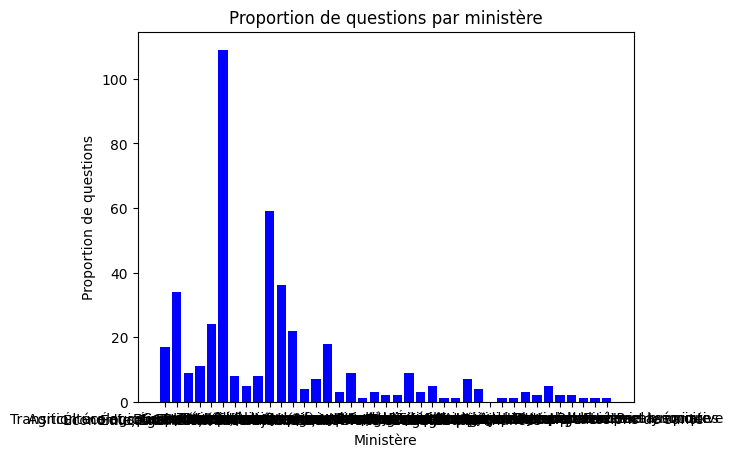

In [63]:
ministères = df_questions['ministère_interrogé'].unique().tolist()
# liste qui comprend le nom de chaque ministère auquel au moins une des questions contenues dans le DataFrame est adressée

nb_questions_ministère = compte_occurrences_par_valeur(df_questions, 'ministère_interrogé', ministères)
# liste qui contient, pour chaque ministère, le nombre de questions présentes dans le dataframe qui lui est adressée)

ministères = [str(element) for element in ministères]

import matplotlib.pyplot as plt

plt.bar(ministères, nb_questions_ministère, color= "blue")
plt.xlabel('Ministère')
plt.ylabel('Proportion de questions')
plt.title('Proportion de questions par ministère')
plt.show()

In [75]:
data_frame = pd.DataFrame({'Ministère':ministères , 'Nombre de questions': nb_questions_ministère })
tableau = tabulate(data_frame, headers='keys', tablefmt='grid', showindex=False)
print(tableau)

+------------------------------------------------------------------+-----------------------+
| Ministère                                                        |   Nombre de questions |
+==================================================================+=======================+
| Agriculture et souveraineté alimentaire                          |                    17 |
+------------------------------------------------------------------+-----------------------+
| Transition écologique et cohésion des territoires                |                    34 |
+------------------------------------------------------------------+-----------------------+
| Armées                                                           |                     9 |
+------------------------------------------------------------------+-----------------------+
| Comptes publics                                                  |                    11 |
+------------------------------------------------------------------+--

## Nuages de mots


In [2]:
!pip install wordcloud

     |████████████████████████████████| 173 kB 3.8 MB/s eta 0:00:01


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
df_questions.head()

,id,groupe,nom,ministÃ¨re_interrogÃ©,rubrique,titre,date,questione,Soutien Ã l'intervenant social en commissariat,05/07/2022,"Mme Carole Grandjean attire l'attention de Mme la ministre de la santÃ© et de la prÃ©vention sur le soutien Ã l'intervenant social en commissariat. ImpulsÃ© Ã Nancy, ce dispositif innovant propose, en coordination avec les services de police, l'intervention d'un travailleur social pour traiter de situations ne relevant d'aucun caractÃ¨re pÃ©nal ni judiciaire, mais nÃ©cessitant une rÃ©ponse sur le plan social ou psychiatrique. Le travailleur social est ainsi chargÃ© de servir de lien avec les partenaires sociaux et d'engager si nÃ©cessaire une dÃ©marche d'aide auprÃ¨s des personnes interpellÃ©es, en coopÃ©ration avec un infirmier psychiatrique mis Ã disposition par le centre psychothÃ©rapique de Nancy (CPN). Le financement du dispositif est assurÃ© par le conseil dÃ©partemental, le CPN par la mise Ã disposition d'un infirmier psychiatrique et par le contrat urbain de cohÃ©sion sociale. Attestant de l'importance des missions qu'elle exerce, l'Ã©quipe a ainsi accompagnÃ© 1 065 personnes en 2021, dont 31 mineurs. Elle appelle ainsi le Gouvernement Ã apporter durablement son concours financier Ã ce dispositif, tant nÃ©cessaire qu'innovant, afin d'accroÃ®tre la visibilitÃ© et la lisibilitÃ© du dispositif lancÃ© par l'association ARS sur le territoire meurthe-et-mosellan et lui demande ses intentions Ã ce sujet."
0,21,Renaissance,Mme Danielle Brulebois,SantÃ© et prÃ©vention,professions de santÃ©,Autorisation d'exercice pour les audioprothÃ©s...,05/07/2022,Mme Danielle Brulebois attire l'attention de M...,NaN,NaN,NaN
1,22,Renaissance,Mme Olga Givernet,"Ãconomie, finances, souverainetÃ© industriell...",retraites : gÃ©nÃ©ralitÃ©s,Conditions du cumul des pensions d'invaliditÃ©...,05/07/2022,Mme Olga Givernet attire l'attention de M. le ...,NaN,NaN,NaN
2,1,"LibertÃ©s, IndÃ©pendants, Outre-mer et Territo...",M. Christophe Naegelen,Agriculture et souverainetÃ© alimentaire,animaux,Cohabitation entre les randonneurs et les patous,05/07/2022,M. Christophe Naegelen interroge M. le ministr...,NaN,NaN,NaN
3,2,Les RÃ©publicains,M. Pierre Cordier,Transition Ã©cologique et cohÃ©sion des territ...,chasse et pÃªche,Pratique de la vÃ©nerie sous terre pour la rÃ©...,05/07/2022,M. Pierre Cordier appelle l'attention de Mme l...,NaN,NaN,NaN
4,3,DÃ©mocrate (MoDem et IndÃ©pendants),M. FrÃ©dÃ©ric Petit,ArmÃ©es,dÃ©fense,DÃ©fense - Union europÃ©enne - SCAF - MGCS - c...,05/07/2022,M. FrÃ©dÃ©ric Petit appelle l'attention de M. ...,NaN,NaN,NaN


In [10]:
text = ' '.join(df_questions['questions'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'questions'